# Kalman Filter
Estimate the position of an object moving in one dimension with a constant velocity.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
class KalmanFilter:
    def __init__(self, F, B, H, Q, R, x0, P0):
        self.F = F   # State transition model
        self.B = B   # Control input model
        self.H = H   # Observation model
        self.Q = Q   # Process noise covariance
        self.R = R   # Measurement noise covariance
        self.x = x0  # Initial state
        self.P = P0  # Initial covariance

    def predict(self, u):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        y = z - np.dot(self.H, self.x)
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.P.shape[0])
        self.P = (I - np.dot(K, self.H)) @ self.P
        return self.x

In [33]:
# Kalman Filter Matrices
F = np.array([[1, 1], [0, 1]])    # State transition matrix
B = np.array([[0.5], [1]])        # Control input matrix
H = np.array([[1, 0]])            # Measurement matrix
Q = np.array([[1, 0], [0, 1]])    # Process noise
R = np.array([[2]])               # Measurement noise
x0 = np.array([[0], [1]])         # Initial state (position=0, velocity=1)
P0 = np.eye(2)                    # Initial covariance matrix

In [34]:
# Create Kalman Filter
kf = KalmanFilter(F, B, H, Q, R, x0, P0)

In [35]:
# Simulated measurements (actual position + noise)
measurements = [0, 2.1, 4.2, 6.3, 8.4, 10.1, 12.3, 14.2, 16.5, 18.0]

# Constant control input
control_input = np.array([[1]])

In [36]:
# Apply Kalman Filter
predicted_positions = []
filtered_positions = []
for z in measurements:
    predicted_positions.append(kf.predict(control_input)[0, 0])
    filtered_positions.append(kf.update(np.array([[z]]))[0, 0])

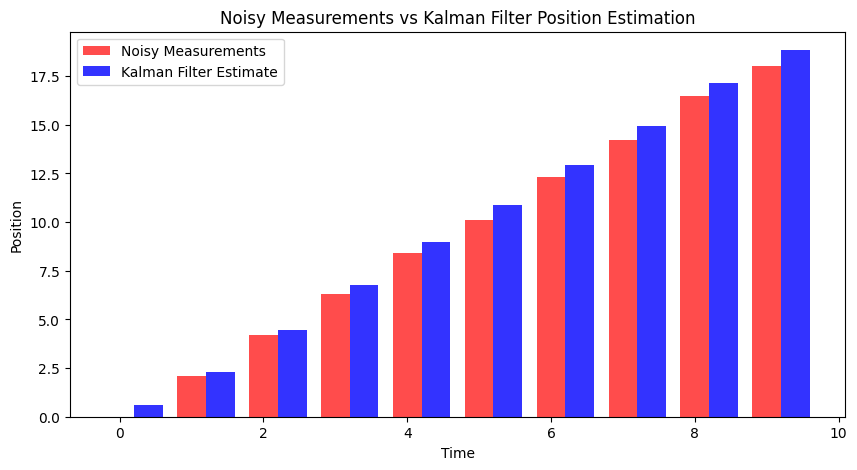

In [37]:
# Bar Graph
x_labels = range(len(measurements))
width = 0.4
plt.figure(figsize=(10, 5))
plt.bar(x_labels, measurements, width=width, label="Noisy Measurements", color='red', alpha=0.7)
plt.bar([x + width for x in x_labels], filtered_positions, width=width, label="Kalman Filter Estimate", color='blue', alpha=0.8)
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.title("Noisy Measurements vs Kalman Filter Position Estimation")
plt.show()